In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0,'..')
from datagenerator import jet_data_generator 
import time
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [5]:
sys.path.insert(0,'../training')
from manifoldembedder import JetDataset, JetPredictDataset
from torch.utils.data import DataLoader, random_split


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [7]:
top_2p_8part = jet_data_generator("signal",0.00005, 2, 8, True,True, 4)
top_3p_8part = jet_data_generator("signal",0.00005, 3, 8, True,True, 4)

In [13]:
top_2p = top_2p_8part.generate_dataset(1000)

In [14]:
top_2p_prime = top_2p_8part.generate_dataset(1000)

In [15]:
top_3p = top_3p_8part.generate_dataset(1000)
#top_3p_prime = top_3p_8part.generate_dataset(10)

In [16]:
top_3p_prime = top_3p_8part.generate_dataset(1000)


In [26]:
data

array([[[-5.10149183e-01,  1.89505362e-02,  8.19936346e-02],
        [-4.67349100e-01, -1.67595661e-02,  2.79755351e-01],
        [-4.78452316e-01,  1.63667836e-01,  1.15816598e-02],
        ...,
        [-5.41879174e-01,  1.01352502e-01,  1.23653057e-01],
        [-4.85695761e-01,  1.88697771e-02,  5.30809582e-03],
        [-5.41978389e-01,  1.01393333e-01,  5.01380122e-02]],

       [[-4.27522432e-01, -5.34162481e-02,  8.39375412e-02],
        [-4.50942609e-01, -1.25661855e-01,  1.88820394e-01],
        [-4.31534902e-01,  2.85039241e-03,  4.31130602e-01],
        ...,
        [-4.66546059e-01, -1.43845497e-01,  1.58732860e-03],
        [-4.69919945e-01,  6.39974901e-03,  1.32893369e-01],
        [-4.69942872e-01,  6.37035430e-03,  9.40949640e-02]],

       [[-4.51755796e-01,  3.85201476e-02,  2.54614382e-01],
        [-4.81285678e-01,  5.71096870e-02,  6.58750735e-02],
        [-5.15325589e-01, -5.31183038e-02,  2.51626250e-01],
        ...,
        [-1.58110528e+00,  3.52334187e-01,

In [17]:
set_3p3p = JetDataset(False, None, top_3p,top_3p_prime,8)

100%|██████████| 8/8 [00:03<00:00,  2.04it/s]


In [18]:
set_2p2p = JetDataset(False, None, top_2p,top_2p_prime,8)

100%|██████████| 8/8 [00:02<00:00,  3.51it/s]


In [19]:
set_2p3p = JetDataset(False, None, top_2p,top_3p,8)

100%|██████████| 8/8 [00:02<00:00,  3.49it/s]


In [20]:
loader = DataLoader(set_2p3p, batch_size=10000,shuffle=False,num_workers=4)

In [21]:
loader2 = DataLoader(set_2p2p, batch_size=10000,shuffle=False,num_workers=4)

In [22]:
loader3 = DataLoader(set_3p3p, batch_size=10000,shuffle=False,num_workers=4)

In [23]:
emd = np.array([])
for x,y,dist in loader:
    emd = np.concatenate([emd,dist.data.numpy()])

In [24]:
emd2 = np.array([])
for x,y,dist in loader2:
    emd2 = np.concatenate([emd2,dist.data.numpy()])

In [25]:
emd3 = np.array([])
for x,y,dist in loader3:
    emd3 = np.concatenate([emd3,dist.data.numpy()])

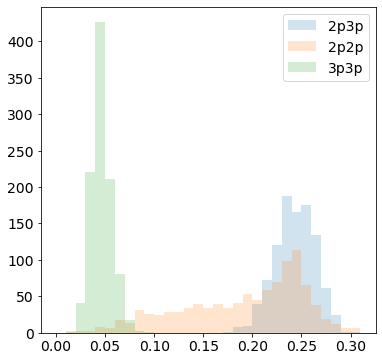

In [31]:
plt.hist(emd, bins=np.arange(0,0.32,0.01),alpha=0.2, label='2p3p');
plt.hist(emd2, bins=np.arange(0,0.32,0.01),alpha=0.2, label='2p2p');
plt.hist(emd3, bins=np.arange(0,0.32,0.01),alpha=0.2, label='3p3p');
plt.legend()
plt.savefig('../figures/EMD_Top_normalized')

In [ ]:
for i in tqdm(range(0,120)):
    data_top_5p_8part = top_5p_8part.generate_dataset(100000)
    print('finished generation')
    with open(f'top_5p_8part_fixedp_{i}.pickle', 'wb') as handle:
        pickle.dump(data_top_5p_8part, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print(f'saved file {i}')
    

  1%|          | 1/120 [05:03<10:01:18, 303.18s/it]

finished generation
saved file 0


  2%|▏         | 2/120 [10:16<10:07:46, 309.04s/it]

finished generation
saved file 1


  2%|▎         | 3/120 [15:25<10:02:57, 309.21s/it]

finished generation
saved file 2


  3%|▎         | 4/120 [20:28<9:52:38, 306.54s/it] 

finished generation
saved file 3


  4%|▍         | 5/120 [25:33<9:46:50, 306.18s/it]

finished generation
saved file 4


  5%|▌         | 6/120 [30:33<9:37:37, 304.01s/it]

finished generation
saved file 5


  6%|▌         | 7/120 [35:22<9:23:25, 299.17s/it]

finished generation
saved file 6


  7%|▋         | 8/120 [40:18<9:16:22, 298.06s/it]

finished generation
saved file 7


  8%|▊         | 9/120 [45:07<9:06:02, 295.15s/it]

finished generation
saved file 8


  8%|▊         | 10/120 [50:01<9:00:23, 294.76s/it]

finished generation
saved file 9


  9%|▉         | 11/120 [55:13<9:05:19, 300.18s/it]

finished generation
saved file 10


 10%|█         | 12/120 [1:00:20<9:04:11, 302.32s/it]

finished generation
saved file 11


 11%|█         | 13/120 [1:05:23<8:59:10, 302.34s/it]

finished generation
saved file 12


 12%|█▏        | 14/120 [1:10:29<8:56:17, 303.56s/it]

finished generation
saved file 13


 12%|█▎        | 15/120 [1:15:37<8:53:34, 304.90s/it]

finished generation
saved file 14


 13%|█▎        | 16/120 [1:20:49<8:52:11, 307.03s/it]

finished generation
saved file 15


 14%|█▍        | 17/120 [1:25:56<8:47:07, 307.06s/it]

finished generation
saved file 16


 15%|█▌        | 18/120 [1:31:00<8:40:28, 306.16s/it]

finished generation
saved file 17


 16%|█▌        | 19/120 [1:35:58<8:31:18, 303.75s/it]

finished generation
saved file 18


 17%|█▋        | 20/120 [1:40:55<8:22:32, 301.53s/it]

finished generation
saved file 19


 18%|█▊        | 21/120 [1:45:48<8:13:39, 299.19s/it]

finished generation
saved file 20


 18%|█▊        | 22/120 [1:50:35<8:02:18, 295.29s/it]

finished generation
saved file 21


 19%|█▉        | 23/120 [1:55:32<7:58:36, 296.05s/it]

finished generation
saved file 22


 20%|██        | 24/120 [2:00:46<8:02:18, 301.44s/it]

finished generation
saved file 23


 21%|██        | 25/120 [2:05:32<7:49:44, 296.68s/it]

finished generation
saved file 24


 22%|██▏       | 26/120 [2:10:31<7:45:49, 297.33s/it]

finished generation
saved file 25


 22%|██▎       | 27/120 [2:15:30<7:41:40, 297.85s/it]

finished generation
saved file 26


 23%|██▎       | 28/120 [2:20:29<7:37:16, 298.22s/it]

finished generation
saved file 27


 24%|██▍       | 29/120 [2:25:23<7:30:23, 296.96s/it]

finished generation
saved file 28


 25%|██▌       | 30/120 [2:30:08<7:19:55, 293.29s/it]

finished generation
saved file 29


 26%|██▌       | 31/120 [2:35:00<7:14:36, 293.00s/it]

finished generation
saved file 30


 27%|██▋       | 32/120 [2:39:50<7:08:32, 292.19s/it]

finished generation
saved file 31


 28%|██▊       | 33/120 [2:44:52<7:07:39, 294.94s/it]

finished generation
saved file 32


In [6]:
top_2p_8part = jet_data_generator("signal",0.00005, 2, 8, True,True, 4)

In [7]:
for i in tqdm(range(56,60)):
    data_top_2p_8part = top_2p_8part.generate_dataset(100000)
    print('finished generation')
    with open(f'top_2p_8part_fixedp_{i}.pickle', 'wb') as handle:
        pickle.dump(data_top_2p_8part, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print(f'saved file {i}')
    

 25%|██▌       | 1/4 [04:37<13:52, 277.59s/it]

finished generation
saved file 56


 50%|█████     | 2/4 [09:14<09:13, 276.98s/it]

finished generation
saved file 57


 75%|███████▌  | 3/4 [13:50<04:36, 276.63s/it]

finished generation
saved file 58


100%|██████████| 4/4 [18:26<00:00, 276.66s/it]

finished generation
saved file 59


In [4]:
#with open('top_2p_8part_fixedp_test.pickle', 'wb') as handle:
#    pickle.dump(data_top_2p_8part, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
top_3p_8part = jet_data_generator("signal",0.00005, 3, 8, True,True,4)

In [ ]:
for i in tqdm(range(99,110)):
    data_top_3p_8part = top_3p_8part.generate_dataset(100000)
    print('finished generation')
    with open(f'top_3p_8part_fixedp_{i}.pickle', 'wb') as handle:
        pickle.dump(data_top_3p_8part, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print(f'saved file {i}')

  9%|▉         | 1/11 [04:39<46:39, 279.91s/it]

finished generation
saved file 99


 18%|█▊        | 2/11 [09:20<42:04, 280.46s/it]

finished generation
saved file 100


 27%|██▋       | 3/11 [14:01<37:24, 280.53s/it]

finished generation
saved file 101


 36%|███▋      | 4/11 [18:41<32:42, 280.29s/it]

finished generation
saved file 102


 45%|████▌     | 5/11 [23:21<28:01, 280.25s/it]

finished generation
saved file 103


In [3]:
sys.path.insert(0,'../optimal_transport')

from emdloss import *


In [5]:
import time

In [6]:
start = time.time()

1640232511.6718123

In [ ]:
import torch as 

In [ ]:
for i in range(70):
    start = time.time()
    print(f'start{i}')
    with 

In [9]:
start = time.time()
data_top_3p_8part = top_3p_8part.generate_dataset(100000)
end = time.time()
print(end-start)

265.1327540874481


In [10]:
with open('top_3p_8part_fixedp_test.pickle', 'wb') as handle:
    pickle.dump(data_top_3p_8part, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
with open('top_2p_8part_fixedp.pickle', 'rb') as handle:
    twop_A = pickle.load(handle)

In [3]:
with open('top_2p_8part_fixedp_prime.pickle', 'rb') as handle:
    twop_B = pickle.load(handle)

In [4]:
with open('top_3p_8part_fixedp.pickle', 'rb') as handle:
    threep_A = pickle.load(handle)

In [5]:
with open('top_3p_8part_fixedp_prime.pickle', 'rb') as handle:
    threep_B= pickle.load(handle)

In [6]:
twoprong = np.concatenate((twop_A, twop_B))

In [7]:
threeprong = np.concatenate((threep_A, threep_B))

In [8]:
def build_two_jet_sets(twop, threep):
    jet1 = np.concatenate((np.random.permutation(twop), np.random.permutation(twop), np.random.permutation(threep), np.random.permutation(threep)))
    jet2 = np.concatenate((np.random.permutation(twop),np.random.permutation(threep),np.random.permutation(twop), np.random.permutation(threep)))
    return jet1, jet2

In [9]:
twop_train, twop_val = train_test_split(twoprong, test_size=0.33)

In [10]:
threep_train, threep_val = train_test_split(threeprong, test_size=0.33)

In [11]:
jettrain1, jettrain2 = build_two_jet_sets(twop_train,threep_train)

In [12]:
jetval1, jetval2 = build_two_jet_sets(twop_val,threep_val)

In [13]:
jettrain1.shape

(536000, 24)

In [14]:
jettrain1.shape

(536000, 24)

In [6]:
twop_A, twop_A_test = train_test_split(twop_A, train_size=80000,test_size=20000)

In [7]:
twop_B, twop_B_test = train_test_split(twop_B, train_size=80000,test_size=20000)

In [8]:
threep_A, threep_A_test = train_test_split(threep_A, train_size=80000,test_size=20000)

In [9]:
threep_B, threep_B_test = train_test_split(threep_B, train_size=80000,test_size=20000)

In [4]:
sys.path.insert(0,'../training')
from manifoldembedder import JetDataset, JetPredictDataset

In [12]:
jet1 = np.concatenate([twop_A, twop_A, threep_A, threep_A])

In [13]:
jet2 = np.concatenate([twop_B, threep_B, twop_B, threep_B])

In [14]:
jet1_test = np.concatenate([twop_A_test, twop_A_test, threep_A_test, threep_A_test])

In [15]:
jet2_test = np.concatenate([twop_B_test, threep_B_test, twop_B_test, threep_B_test])

In [16]:
len(twop_A_test)

20000

In [17]:
jet1_test_label = np.concatenate([np.zeros(40000),np.ones(40000)])

In [18]:
len(jet1_test_label)

80000

In [5]:
import torch

In [ ]:
for i in range(42,100):
    train_set = JetDataset(True, "./", f'top_2p_8part_fixedp_{i}.pickle',f'top_2p_8part_fixedp_{i+1}.pickle',8)
    torch.save(train_set, f'/nobackup/users/sangeon/datasets/jetdataset_8part_2p2p_idx_{i}_{i+1}.pt')
    train_set = JetDataset(True, "./", f'top_3p_8part_fixedp_{i}.pickle',f'top_3p_8part_fixedp_{i+1}.pickle',8)
    torch.save(train_set, f'/nobackup/users/sangeon/datasets/jetdataset_8part_3p3p_idx_{i}_{i+1}.pt')
    train_set = JetDataset(True, "./", f'top_2p_8part_fixedp_{i}.pickle',f'top_3p_8part_fixedp_{i+1}.pickle',8)
    torch.save(train_set, f'/nobackup/users/sangeon/datasets/jetdataset_8part_2p3p_idx_{i}_{i+1}.pt')

 98%|█████████▊| 768/782 [03:41<00:04,  3.48it/s]

In [ ]:
for i in range(100):
    train_set = JetDataset(True, "./", f'top_2p_8part_fixedp_{i}.pickle',f'top_3p_8part_fixedp_{i}.pickle',8)
    torch.save(train_set, f'/nobackup/users/sangeon/datasets/jetdataset_8part_2p3p_idx_{i}_{i}.pt')

 68%|██████▊   | 531/782 [02:33<01:11,  3.50it/s]

In [17]:
train_set = JetDataset(False, None, jettrain1,jettrain2,8)

100%|██████████| 4188/4188 [19:55<00:00,  3.50it/s]


In [18]:
val_set = JetDataset(False, None, jetval1,jetval2,8)

100%|██████████| 2063/2063 [09:47<00:00,  3.51it/s]


In [ ]:
#test_set = JetDataset(False, None, jet1_test,jet2_test,8)

# concatenate dataset

In [1]:
import os, sys, torch

In [2]:
sys.path.insert(0,'../training')
from manifoldembedder import JetDataset, JetPredictDataset

In [9]:
file_list = []
for file in os.listdir('/nobackup/users/sangeon/datasets'):
    if "2p2p" in file:
        #print(file.split("_"))
        file_list.append(torch.load(os.path.join('/nobackup/users/sangeon/datasets',file)))
    

In [10]:
c = torch.utils.data.ConcatDataset(file_list)

torch.save(c, os.path.join('/nobackup/users/sangeon/datasets','concat_temp_only2p.pt'))

In [11]:
import os

In [11]:
torch.save(c, os.path.join('/nobackup/users/sangeon/datasets','concat_temp.pt'))

In [ ]:
file_list = [torch.load(os.path.join('/nobackup/users/sangeon/datasets','jetdataset_8part_2p2p_idx_101_102.pt')),torch.load(os.path.join('/nobackup/users/sangeon/datasets','jetdataset_8part_2p3p_idx_101_102.pt')),torch.load(os.path.join('/nobackup/users/sangeon/datasets','jetdataset_8part_3p3p_idx_101_102.pt'))]

c = torch.utils.data.ConcatDataset(file_list)

torch.save(c, os.path.join('/nobackup/users/sangeon/datasets','concat_temp_val.pt'))

In [25]:
a = torch.load('jetdataset_train2.pt')

In [26]:
b = torch.load('jetdataset_train.pt')

In [27]:
c = torch.utils.data.ConcatDataset([a,b])

In [30]:
torch.save(c, 'jetdataset_train_concat.pt')

In [22]:
predict_set = JetPredictDataset(False,None,jet1_test,jet1_test_label,8)

In [21]:
torch.save(train_set, 'jetdataset_train2.pt')

In [22]:
torch.save(val_set, 'jetdataset_val2.pt')

In [24]:
torch.save(test_set, 'jetdataset_test.pt')

In [25]:
torch.save(predict_set, 'jetdataset_predict.pt')

In [ ]:
training_generator = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=False)

In [24]:
train_loader = torch.utils.data.DataLoader(train_set2, batch_size=10, shuffle=False)

In [ ]:
for batch in train_loader:
    x,y,emd = batch
    print(x.shape,y.shape,emd)

In [17]:
data_top_2p_8part.shape

(5000, 24)

In [4]:
bkg_2p_8part = jet_data_generator("background",0.00005, 2, 8)

In [5]:
start = time.time()
data_sig_2p_8part = sig_2p_8part.generate_dataset(1000)
end = time.time()
print(end-start)

6.730315208435059


In [6]:
with open('sig_2p_8part_fixedp.pickle', 'wb') as handle:
    pickle.dump(data_sig_2p_8part, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
start = time.time()
data_bkg_2p_8part = bkg_2p_8part.generate_dataset(1000)
end = time.time()
print(end-start)

6.740593433380127


In [8]:
with open('bkg_2p_8part_fixedp.pickle', 'wb') as handle:
    pickle.dump(data_bkg_2p_8part, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
sig_3p_8part = jet_data_generator("signal",0.00005, 3, 8)

In [10]:
start = time.time()
data_sig_3p_8part = sig_3p_8part.generate_dataset(1000)
end = time.time()
print(end-start)

6.744920969009399


In [11]:
with open('sig_3p_8part_fixedp.pickle', 'wb') as handle:
    pickle.dump(data_sig_3p_8part, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
sig_4p_8part = jet_data_generator("signal",0.00005, 4, 8)

In [13]:
start = time.time()
data_sig_4p_8part = sig_4p_8part.generate_dataset(1000)
end = time.time()
print(end-start)

6.805036306381226


In [14]:
with open('sig_4p_8part_fixedp.pickle', 'wb') as handle:
    pickle.dump(data_sig_4p_8part, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
sig_2p_4part = jet_data_generator("signal",0.00005, 2, 4)

In [16]:
start = time.time()
data_sig_2p_4part = sig_2p_4part.generate_dataset(1000)
end = time.time()
print(end-start)

2.7547028064727783


In [17]:
with open('sig_2p_4part_fixedp.pickle', 'wb') as handle:
    pickle.dump(data_sig_2p_4part, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
sig_3p_4part = jet_data_generator("signal",0.00005, 3, 4)

In [19]:
start = time.time()
data_sig_3p_4part = sig_3p_4part.generate_dataset(1000)
end = time.time()
print(end-start)

2.7955634593963623


In [20]:
with open('sig_3p_4part_fixedp.pickle', 'wb') as handle:
    pickle.dump(data_sig_3p_4part, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
sig_2p_8part_fixedp = jet_data_generator("signal",0.00005, 2, 8, True)
sig_2p_8part_variedp = jet_data_generator("signal",0.00005, 2, 8, False)


In [ ]:
data_sig_2_8part_fixedp_prime = sig_2p_8part_fixedp.generate_dataset(1000)
with open('sig_3p_4part_fixedp.pickle', 'wb') as handle:
    pickle.dump(data_sig_3p_4part, handle, protocol=pickle.HIGHEST_PROTOCOL)